# Practice 2 - Manuel Isaac González Chi
# Machine Learning UADY
##  Binary Classification Through Logistic Regression

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Importing and visualizing the data

First, data is imported from a text file. The file includes 100 points, in three columns, indicating the entries x1, x2 and the binary output. Data is also plot. 

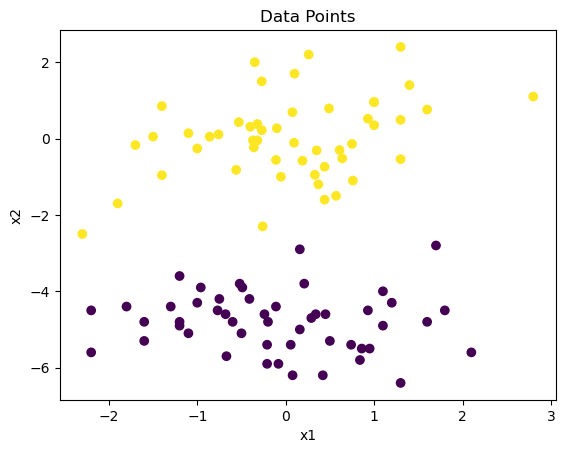

In [2]:
x1, x2, y = np.loadtxt('data.txt', delimiter=' ', unpack=True)
plt.scatter(x1, x2, c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points')
plt.show()

### Defining function

The model is evaluated using the sigmoid function, which maps any real number to the range [0, 1]. The function is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where z represents the hypothesis function, which in this case, is just the linear model:

$$ z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def hypothesis(theta, x):
    z = np.dot(theta, x)
    return sigmoid(z)

To train the model, the cost function is defined as:

$$ J(\theta) = -\sum_{i=1}^{m}\left[
y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})
\right] $$

In [5]:
def cost_function(theta, x, y):
    m = len(y)
    total_cost = 0
    for i in range(m):
        h = hypothesis(theta, x[i])
        total_cost += -y[i] * np.log(h) - (1 - y[i]) * np.log(1 - h)
    return total_cost

The following function implements the mini-batch gradient descent algorithm to optimize the parameter vector of the predictive model. First, it initializes the weights randomly and then iteratively updates them over a fixed number of training iterations. During each iteration, the training dataset is divided into smaller subsets called mini-batches of size batch_size. For each mini-batch, the function computes the model predictions using the hypothesis function, accumulates the gradient of the error between the predicted and true values, and updates the parameters  using the learning rate. After completing each full iteration, the function evaluates the overall cost on the entire dataset and stores it in error_history, allowing the user to monitor the convergence of the training process.

In [6]:
def mini_batch_gradient_descent(x, y, alpha, num_iterations, batch_size):
    np.random.seed(42) 
    m = len(y) # Number of training examples
    error_history = [] # To store cost function values for plotting
    theta = np.random.rand(x.shape[1])*0.02-0.01  # Initialize theta randomly
    print("Initial theta:", theta)
    initial_theta = theta.copy()  # Store initial theta for plotting
    for _ in range(num_iterations):
        for i in range(0, m, batch_size):
            x_batch = x[i:i + batch_size] # Get mini-batch of data
            y_batch = y[i:i + batch_size]
            gradient = np.zeros_like(theta) # Initialize gradient
            for j in range(batch_size):
                h = hypothesis(theta, x_batch[j]) 
                gradient += (h - y_batch[j]) * x_batch[j] # Compute gradient for the mini-batch
            theta -= alpha * gradient # Update theta using the computed gradient
        error_history.append(cost_function(theta, x, y)) # Store cost function value after each iteration

    # Plotting the decision boundary        
    x1_line = np.linspace(-3, 3, 100)
    x2_line = -(theta[0] + theta[1] * x1_line) / theta[2]
    
    # Plotting the initial decision boundary
    x2_line_initial = -(initial_theta[0] + initial_theta[1] * x1_line) / initial_theta[2]
    
    # Plotting the data points and decision boundaries
    plt.scatter(x1, x2, c=y)
    plt.plot(x1_line, x2_line, color='red', linestyle='--')
    plt.plot(x1_line, x2_line_initial, color='blue', linestyle='--')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Data Points with Decision Boundary')
    plt.legend(['Data Points', 'Final Decision Boundary', 'Initial Decision Boundary'])
    plt.show()

    return theta, error_history

### Data vector generation

In [7]:
bias = np.ones(x1.shape[0])
X = np.column_stack((bias, x1, x2))
print(X[:5])

[[ 1.     1.3   -0.54 ]
 [ 1.    -2.3   -2.5  ]
 [ 1.    -0.37  -0.047]
 [ 1.     0.49   0.79 ]
 [ 1.     1.     0.95 ]]


### Calling the mini-batch gradient descent function

Initial theta: [-0.0025092   0.00901429  0.00463988]


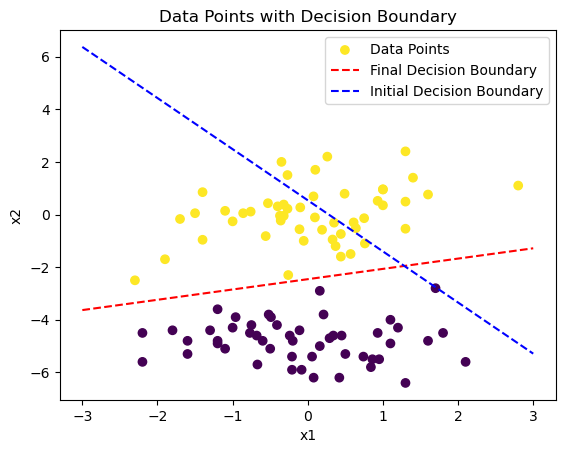

In [8]:
theta, error_history = mini_batch_gradient_descent(X, y, alpha=0.3, num_iterations=100, batch_size=20)

### Showing training results

In [9]:
print("Learned parameters (theta):", theta)
print("Final cost:", error_history[-1])

Learned parameters (theta): [12.61817815 -2.00956394  5.13436755]
Final cost: 0.43457386167249884


### Plotting the error history

Text(0, 0.5, 'Cost')

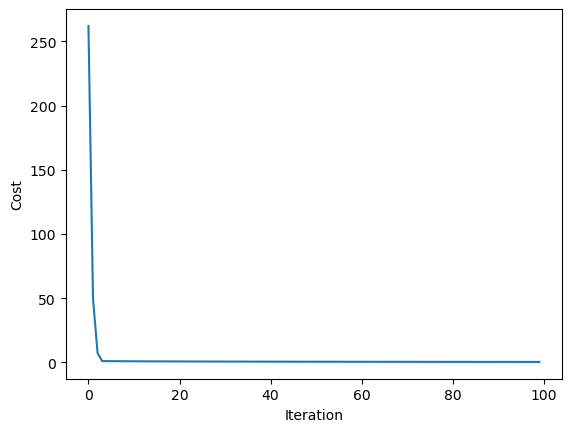

In [10]:
plt.plot(range(len(error_history)), error_history)
plt.xlabel('Iteration') 
plt.ylabel('Cost')

### Conclusion

The results show that the **mini-batch gradient descent** algorithm was able to successfully train a logistic regression classifier and converge in a stable way. After several experimental trials with different learning rates and batch sizes, the following parameters were found to be the most optimal for this dataset. Using a learning rate of **$\alpha = 0.3 $**, a batch size of 20, and only **100 training iterations**, the cost function decreased rapidly and reached a final value of approximately **0.4346**, indicating that the model achieved good separation between the two classes. The decision boundary also shifted significantly from its initial random position to a final boundary that better divides the data points. This confirms that the model was effectively trained within a relatively small number of loops.

The learned optimal parameters were:

$$
\theta = 
\begin{bmatrix}
12.6182 \\
-2.0096 \\
5.1344
\end{bmatrix}
$$

Thus, the final linear model is:

$$
z = 12.6182 - 2.0096x_1 + 5.1344x_2
$$

And the final hypothesis using the sigmoid activation is:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where the final decision boundary is defined by:

$$
12.6182 - 2.0096x_1 + 5.1344x_2 = 0
$$

Overall, this experiment demonstrates that mini-batch gradient descent can efficiently optimize the model parameters and achieve convergence in only 100 iterations.
